In [1]:
import sys
sys.path.append('../src')

from models.ViTL16Model.train import train as train_ViTL16Model

from utils.show_graph import plot_history

In [2]:
package_model_path, loss_history, auc_history = train_ViTL16Model(
    num_epochs=50,
    learning_rate=1e-05
)

Downloading: "https://download.pytorch.org/models/vit_l_16-852ce7e3.pth" to /home/education/.cache/torch/hub/checkpoints/vit_l_16-852ce7e3.pth
100%|██████████| 1.13G/1.13G [00:10<00:00, 121MB/s] 
[DEBUG] 2023-09-01 01:29:13 - Using device: cuda(NVIDIA L4)
[DEBUG] 2023-09-01 01:29:13 - Starting training on cuda at 2023-09-01 10:29:13
[DEBUG] 2023-09-01 01:29:13 - Model parameters:
[DEBUG] 2023-09-01 01:29:13 - class_token: torch.Size([1, 1, 1024])
[DEBUG] 2023-09-01 01:29:13 - conv_proj.weight: torch.Size([1024, 3, 16, 16])
[DEBUG] 2023-09-01 01:29:13 - conv_proj.bias: torch.Size([1024])
[DEBUG] 2023-09-01 01:29:13 - encoder.pos_embedding: torch.Size([1, 197, 1024])
[DEBUG] 2023-09-01 01:29:13 - encoder.layers.encoder_layer_0.ln_1.weight: torch.Size([1024])
[DEBUG] 2023-09-01 01:29:13 - encoder.layers.encoder_layer_0.ln_1.bias: torch.Size([1024])
[DEBUG] 2023-09-01 01:29:13 - encoder.layers.encoder_layer_0.self_attention.in_proj_weight: torch.Size([3072, 1024])
[DEBUG] 2023-09-01 01:29:

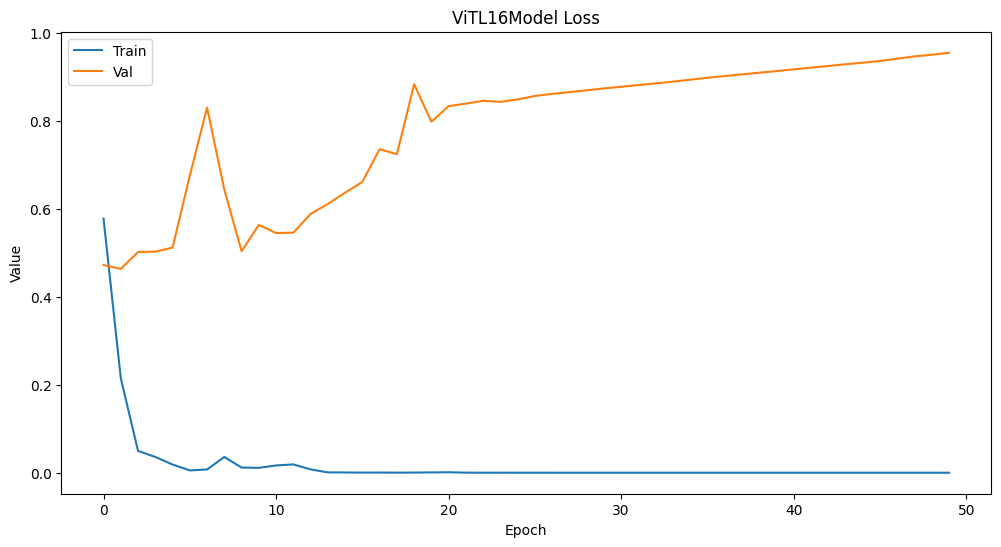

In [3]:
plot_history(loss_history, "ViTL16Model Loss")

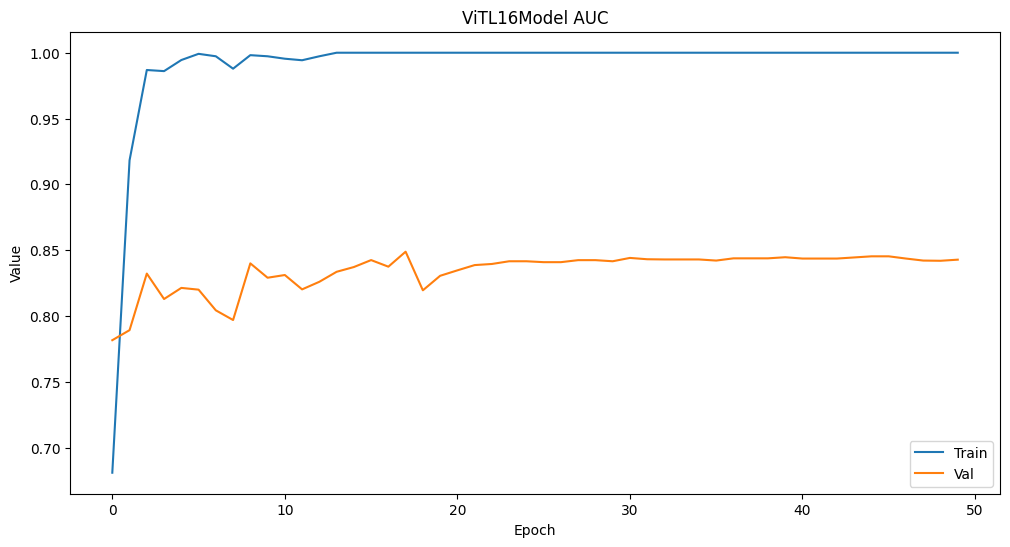

In [4]:
plot_history(auc_history, "ViTL16Model AUC")